In [1]:
#1. frequency vs. current (four sets of data (two isotopes, two polarities)), four lines, individual points, the slopes, axial intercepts
#2. what model (=fit function) describes the frequency vs. current relationship best. chi^2 method
#3. plot residuals, i.e. yi − f (xi) where yi is the measured data point, f is the fit function and xi is the independent variableat which the data yi was taken. As the error on the residual use only the error from yi.
    #4. (combine positive and negative polarities)
#5. account for errors(derived error estimates or data have equal weight and then to estimate errors )
#6. ratio ν85/ν87 between the Zeeman resonance frequencies
    #7. Breit-Rabi equation (Eq. 6), and the other is the magneticfield of the Helmholtz coils as a function of current (Eq. 8). Write down the equations, rearrangethem, see how the two isotopes fit in
#8. determine I85 and I87 individually, directly from linear fits to your data sets
#9. use Eq. (6) to determine the value of B at thebulb for one positive and one negative value of the current in the coil
    #10. compare these values withthose calculated from the coil dimensions and current
#11. Determine the magnitude of the ambient (“Earth’s”) magnetic field (3 methods)
#12. Explain why there is a resonance at zero field
#13. make a rough estimate or calculation ofthe pumping time to compare with your experimentally measured value

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

In [174]:
mpl.rcParams['text.usetex'] = False

In [175]:
df = pd.read_csv("OPT Lab 85 Data.csv")
df1 = df[0:31]  #The last point is an outlier so it isn't considered
df1.columns
df1

,Mag Field (Gauss),85 Mid Frequency,85 Min Frequency,85 Max Frequency,Current (A),Theoretical Frequency R^85
0,3.9800,3.0880,3.0860,3.0910,0.90,2780000.0
1,3.5300,2.7820,2.7810,2.7840,0.80,2470000.0
2,3.0900,2.4740,2.4740,2.4780,0.70,2160000.0
3,2.6500,2.1680,2.1660,2.1690,0.60,1850000.0
4,2.2100,1.8400,1.8380,1.8410,0.50,1550000.0
5,1.7700,1.5550,1.5530,1.5560,0.40,1240000.0
6,1.3300,1.2390,1.2370,1.2420,0.30,927000.0
7,1.1000,1.0970,1.1040,1.0990,0.25,773000.0
8,0.8840,0.9520,0.9490,0.9550,0.20,618000.0
9,0.6630,0.7900,0.7870,0.7930,0.15,464000.0


In [176]:
df2 = pd.read_csv("OPT Lab 87 Data.csv")
df2.columns

Index(['Mag Field (Gauss)', '87 Min Frequency', '87 Max Frequency',
       '87 Mid Frequency', 'Current (A)', 'Theoretical Frequency R^87'],
      dtype='object')

In [177]:
N=135
R=0.275 # radius m
C=9.00E-03 # constant
I_85=1.5
I_87=2.5

Text(0, 0.5, 'Frequency (Hz)')

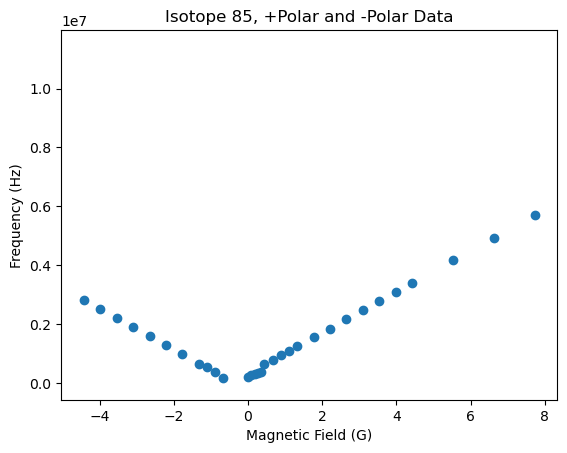

In [178]:
#85, +Polar & -Polar, B vs. freq
B1 = np.array(df1["Mag Field (Gauss)"])
freq1 = np.array(df1["85 Mid Frequency"])*1e6
freqerr_upper1 = np.abs(df1['85 Max Frequency'] - freq1)
freqerr_lower1 = np.abs(freq1 - df1['85 Min Frequency'])

plt.scatter(B1, freq1)
plt.errorbar(B1, freq1, [freqerr_upper1, freqerr_lower1], linewidth=0)
plt.title('Isotope 85, +Polar and -Polar Data')
plt.xlabel('Magnetic Field (G)')
plt.ylabel('Frequency (Hz)')

Text(0, 0.5, 'Frequency (Hz)')

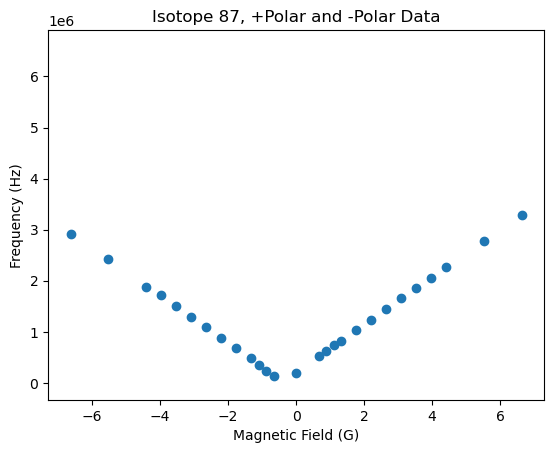

In [179]:
#87, +Polar & -Polar, B vs. freq
B2 = np.array(df2["Mag Field (Gauss)"])
freq2 = np.array(df2["87 Mid Frequency"])*1e6
freqerr_upper2 = np.abs(df2['87 Max Frequency'] - freq2)
freqerr_lower2 = np.abs(freq2 - df2['87 Min Frequency'])

plt.scatter(B2, freq2)
plt.errorbar(B2, freq2, [freqerr_upper2, freqerr_lower2], linewidth=0)
plt.title('Isotope 87, +Polar and -Polar Data')
plt.xlabel('Magnetic Field (G)')
plt.ylabel('Frequency (Hz)')

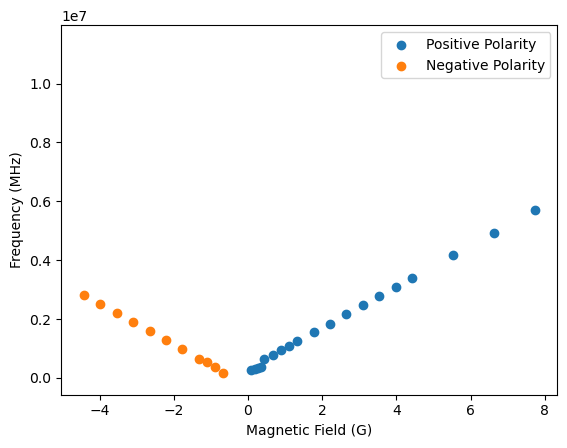

In [180]:
# separate #85, +Polar & -Polar, B vs. freq
# positive polarity
B1_pos = B1[np.where(B1>0)]
freq1_pos = freq1[np.where(B1>0)]
freqerr_upper_pos1 = np.array(freqerr_upper1)[np.where(B1>0)]
freqerr_lower_pos1 = np.array(freqerr_lower1)[np.where(B1>0)]

plt.scatter(B1_pos, freq1_pos, label='Positive Polarity')
plt.errorbar(B1_pos, freq1_pos, [freqerr_lower_pos1, freqerr_upper_pos1], linewidth=0) # check what comes first: lower or upper

# negative polarity
B1_neg = B1[np.where(B1<0)]
freq1_neg = freq1[np.where(B1<0)]
freqerr_upper_neg1 = np.array(freqerr_upper1)[np.where(B1<0)]
freqerr_lower_neg1 = np.array(freqerr_lower1)[np.where(B1<0)]

plt.scatter(B1_neg, freq1_neg, label='Negative Polarity')
plt.errorbar(B1_neg, freq1_neg, [freqerr_lower_neg1, freqerr_upper_neg1], linewidth=0) # check what comes first: lower or upper
plt.xlabel('Magnetic Field (G)')
plt.ylabel('Frequency (MHz)')
plt.legend()

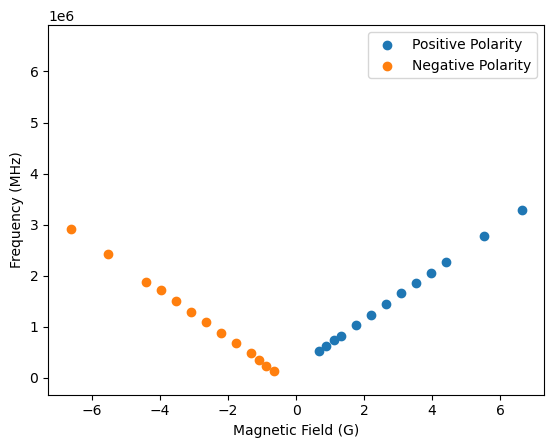

In [9]:
# separate #87, +Polar & -Polar, B vs. freq
# positive polarity
B2_pos = B2[np.where(B2>0)]
freq2_pos = freq2[np.where(B2>0)]
freqerr_upper_pos2 = np.array(freqerr_upper2)[np.where(B2>0)]
freqerr_lower_pos2 = np.array(freqerr_lower2)[np.where(B2>0)]

plt.scatter(B2_pos, freq2_pos, label='Positive Polarity')
plt.errorbar(B2_pos, freq2_pos, [freqerr_lower_pos2, freqerr_upper_pos2], linewidth=0) # check what comes first: lower or upper

# negative polarity
B2_neg = B2[np.where(B2<0)]
freq2_neg = freq2[np.where(B2<0)]
freqerr_upper_neg2 = np.array(freqerr_upper2)[np.where(B2<0)]
freqerr_lower_neg2 = np.array(freqerr_lower2)[np.where(B2<0)]

plt.scatter(B2_neg, freq2_neg, label='Negative Polarity')
plt.errorbar(B2_neg, freq2_neg, [freqerr_lower_neg2, freqerr_upper_neg2], linewidth=0) # check what comes first: lower or upper
plt.xlabel('Magnetic Field (G)')
plt.ylabel('Frequency (MHz)')
plt.legend()

In [10]:
freq1.shape, curr1.shape

NameError: name 'curr1' is not defined

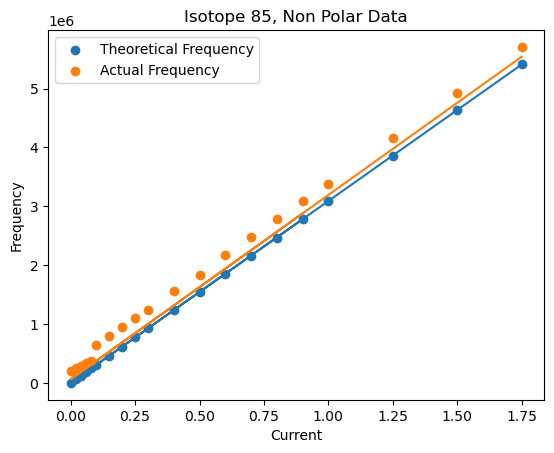

In [11]:
#current vs frequency, 85
current = np.array(df1["Current (A)"])
curr1 = current[0:20]
thfreqq1 = np.array(df1["Theoretical Frequency R^85"])
thfreq1 = thfreqq1[0:20]

a, b = np.polyfit(curr1, thfreq1, 1)
c, d = np.polyfit(current, freq1, 1)
plt.scatter(curr1[0:20], thfreq1[0:20], label='Theoretical Frequency')
plt.scatter(curr1, freq1[0:20], label='Actual Frequency')
plt.plot(curr1, a*curr1+b)
plt.plot(curr1, c*curr1+d) 
plt.title('Isotope 85, Non Polar Data')
plt.xlabel('Current')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#HOW TO ADD ERROR?

Plan:
- first line of best fit of each polarity to estimate the magnitude of the ambient field
- shift absolute value graph to reflect ambient field estimation
- take absolute value of negative polarity measurements
- repeat linear fit

Better plan:
- to estimate errors, do seperate linear fits on each leg and pick the error that produces the most conservative confidence interval
- nonlinear fit for an absolute value function for the actual fit? and compare it to seperate linear fits and to a fit where you combine the polarities

In [35]:
df1.columns

Index(['Mag Field (Gauss)', '85 Mid Frequency', '85 Min Frequency',
       '85 Max Frequency', 'Current (A)', 'Theoretical Frequency R^85'],
      dtype='object')

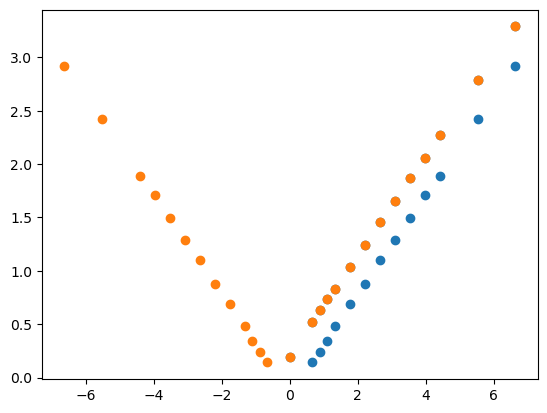

In [247]:
### ERROR ESTIMATES COMPARISON: 87 

b87 = df2["Mag Field (Gauss)"]
f87 = df2['87 Mid Frequency']
f87_upper_err = df2['87 Max Frequency']
f87_lower_err = df2['87 Min Frequency']

# b87 = df1["Mag Field (Gauss)"]
# f87 = df1['85 Mid Frequency']
# f87_upper_err = df1['85 Max Frequency']
# f87_lower_err = df1['85 Min Frequency']

plt.scatter(np.abs(b87), f87)
plt.scatter(b87, f87)

# 1: positive polarity fit
b87_pos = b87[b87>0]
f87_pos = f87[b87>0]
f87_upper_err_pos = f87_upper_err[b87>0]
f87_lower_err_pos = f87_lower_err[b87>0]

pos_err = f87_upper_err_pos - f87_pos
neg_err = f87_pos - f87_lower_err_pos

# weighted fit estimation

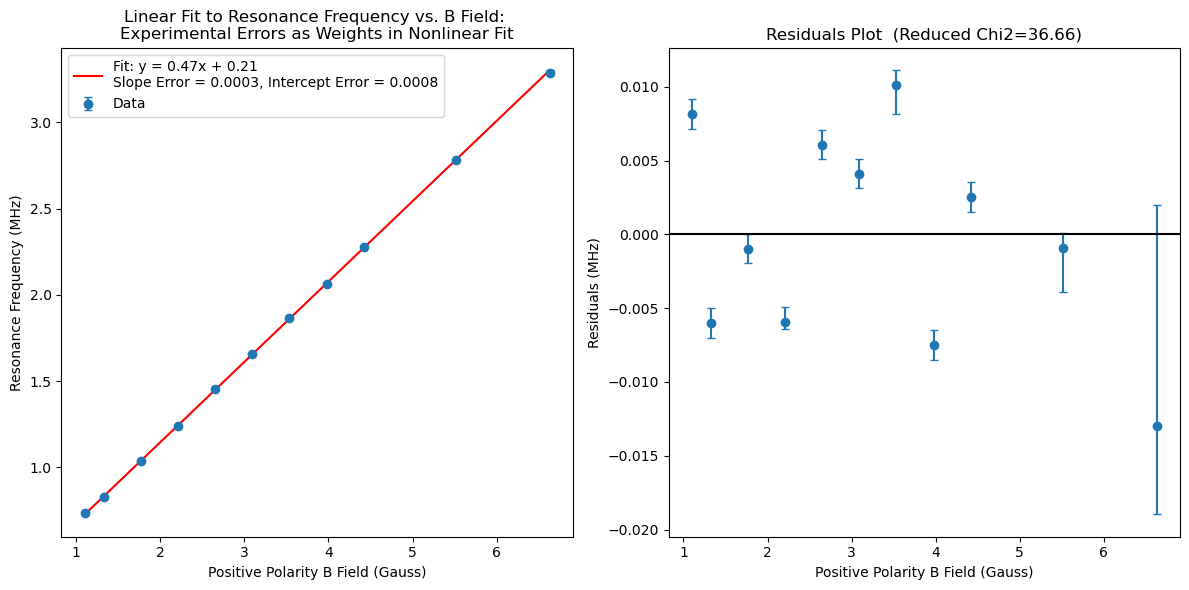

In [248]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Filter positive b87 values
b87_pos = b87[b87 > 0]
f87_pos = f87[b87 > 0]
f87_upper_err_pos = f87_upper_err[b87 > 0]
f87_lower_err_pos = f87_lower_err[b87 > 0]

# # cut for 85 positive polarity

b87_pos = b87[b87 > 1]
f87_pos = f87[b87 > 1]
f87_upper_err_pos = f87_upper_err[b87 > 1]
f87_lower_err_pos = f87_lower_err[b87 > 1]

# Symmetric error approximation
pos_err = np.abs(f87_upper_err_pos - f87_pos)
neg_err = np.abs(f87_pos - f87_lower_err_pos)
avg_err = 0.5 * (pos_err + neg_err)

sampled_err = np.random.normal(0, avg_err, len(b87_pos))

# Linear model
def linear_model(x, m, b):
    return m * x + b

# Fit using curve_fit with weights = 1 / sigma
popt, pcov = curve_fit(linear_model, b87_pos, f87_pos, sigma=avg_err, absolute_sigma=True)
m_fit, b_fit = popt
m_err, b_err = np.sqrt(np.diag(pcov))

# Plotting the data and fit
x_fit = np.linspace(min(b87_pos), max(b87_pos), 100)
y_fit = linear_model(x_fit, m_fit, b_fit)



plt.figure(figsize=(12, 6))

# Plot data with error bars and linear fit
plt.subplot(1, 2, 1)
plt.errorbar(b87_pos, f87_pos, yerr=[neg_err, pos_err], fmt='o', label='Data', capsize=3)
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: y = {m_fit:.2f}x + {b_fit:.2f}\nSlope Error = {m_err:.4f}, Intercept Error = {b_err:.4f}')
plt.xlabel('Positive Polarity B Field (Gauss)')
plt.ylabel('Resonance Frequency (MHz)')
plt.legend()
plt.title('Linear Fit to Resonance Frequency vs. B Field: \nExperimental Errors as Weights in Nonlinear Fit')
# plt.grid(True)

# Residuals plot
residuals = f87_pos - linear_model(b87_pos, m_fit, b_fit)
chi2 = np.sum((residuals / avg_err) ** 2)
dof = len(b87_pos) - 2  # degrees of freedom (number of data points - 2 parameters)
chi2_red = chi2 / dof
plt.subplot(1, 2, 2)
plt.errorbar(b87_pos, residuals, yerr=[neg_err, pos_err], fmt='o', label='Residuals', capsize=3)
plt.axhline(0, color='black', linestyle='-')
plt.xlabel('Positive Polarity B Field (Gauss)')
plt.ylabel(f'Residuals (MHz)')
plt.title(f'Residuals Plot  (Reduced Chi2={chi2_red:.2f})')
# plt.grid(True)

plt.tight_layout()
plt.show()


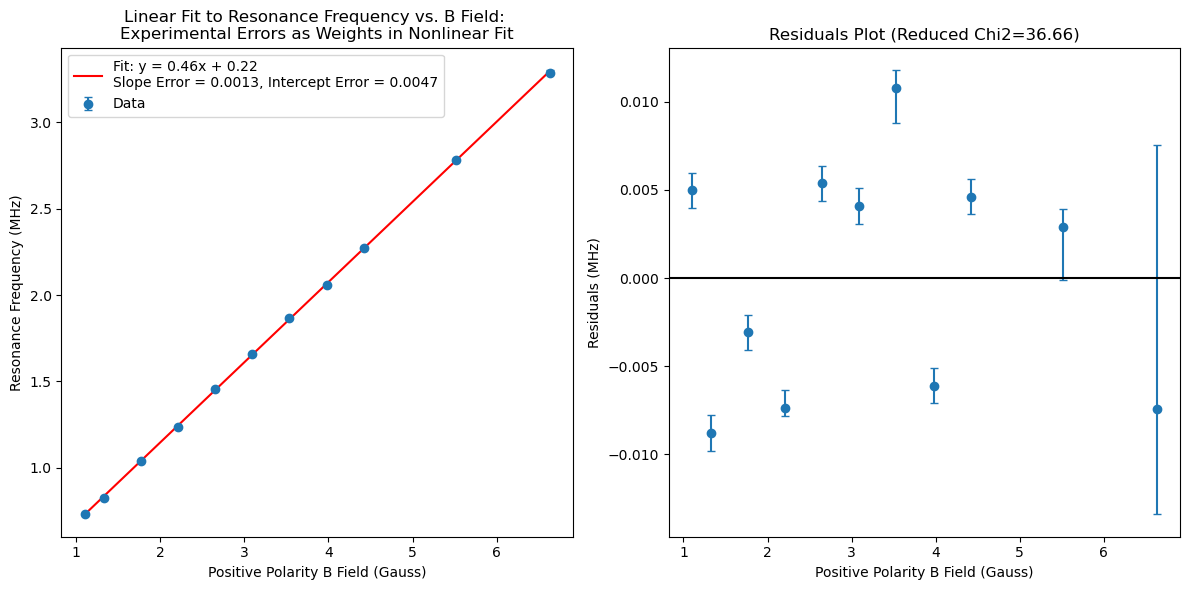

0.006398792499640964


In [249]:
# Intermediate fit for estimating error from residuals

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Symmetric error approximation
pos_err = np.abs(f87_upper_err_pos - f87_pos)
neg_err = np.abs(f87_pos - f87_lower_err_pos)
avg_err = 0.5 * (pos_err + neg_err)

# Linear model
def linear_model(x, m, b):
    return m * x + b

# Fit using curve_fit with weights = 1 / sigma
popt, pcov = curve_fit(linear_model, b87_pos, f87_pos)
m_fit, b_fit = popt
m_err, b_err = np.sqrt(np.diag(pcov))

# Plotting the data and fit
x_fit = np.linspace(min(b87_pos), max(b87_pos), 100)
y_fit = linear_model(x_fit, m_fit, b_fit)

plt.figure(figsize=(12, 6))

# Plot data with error bars and linear fit
plt.subplot(1, 2, 1)
plt.errorbar(b87_pos, f87_pos, yerr=[neg_err, pos_err], fmt='o', label='Data', capsize=3)
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: y = {m_fit:.2f}x + {b_fit:.2f}\nSlope Error = {m_err:.4f}, Intercept Error = {b_err:.4f}')
plt.xlabel('Positive Polarity B Field (Gauss)')
plt.ylabel('Resonance Frequency (MHz)')
plt.legend()
plt.title('Linear Fit to Resonance Frequency vs. B Field: \nExperimental Errors as Weights in Nonlinear Fit')
# plt.grid(True)

chi2 = np.sum((residuals / avg_err) ** 2)
dof = len(b87_pos) - 2  # degrees of freedom (number of data points - 2 parameters)
chi2_red = chi2 / dof

# Residuals plot
residuals = f87_pos - linear_model(b87_pos, m_fit, b_fit)
plt.subplot(1, 2, 2)
plt.errorbar(b87_pos, residuals, yerr=[neg_err, pos_err], fmt='o', label='Residuals', capsize=3)
plt.axhline(0, color='black', linestyle='-')
plt.xlabel('Positive Polarity B Field (Gauss)')
plt.ylabel('Residuals (MHz)')
plt.title(f'Residuals Plot (Reduced Chi2={chi2_red:.2f})')
# plt.grid(True)

plt.tight_layout()
plt.show()

new_err = np.std(residuals)
print(np.std(residuals))

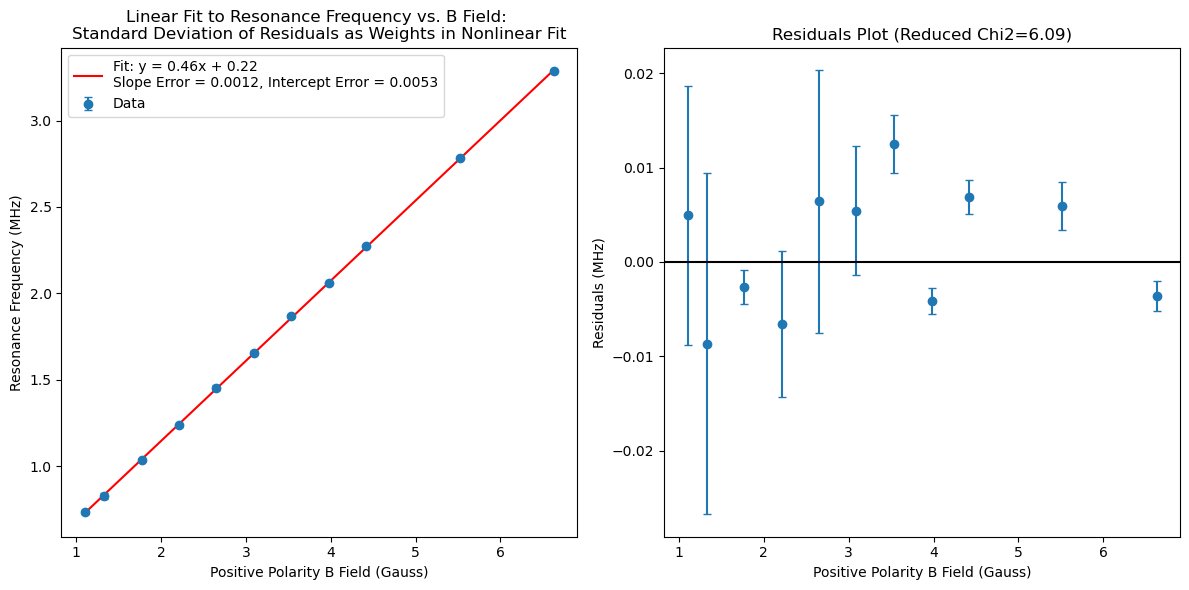

In [250]:
# Intermediate fit for estimating error from residuals

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Symmetric error approximation
pos_err = np.abs(f87_upper_err_pos - f87_pos)
neg_err = np.abs(f87_pos - f87_lower_err_pos)
avg_err = 0.5 * (pos_err + neg_err)
sampled_err = np.abs(np.random.normal(0, new_err, len(b87_pos)))
err_used = sampled_err
# Linear model
def linear_model(x, m, b):
    return m * x + b

# Fit using curve_fit with weights = 1 / sigma
popt, pcov = curve_fit(linear_model, b87_pos, f87_pos, sigma=err_used)
m_fit, b_fit = popt
m_err, b_err = np.sqrt(np.diag(pcov))

# Plotting the data and fit
x_fit = np.linspace(min(b87_pos), max(b87_pos), 100)
y_fit = linear_model(x_fit, m_fit, b_fit)

plt.figure(figsize=(12, 6))

# Plot data with error bars and linear fit
plt.subplot(1, 2, 1)
plt.errorbar(b87_pos, f87_pos, yerr=np.abs(err_used), fmt='o', label='Data', capsize=3)
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: y = {m_fit:.2f}x + {b_fit:.2f}\nSlope Error = {m_err:.4f}, Intercept Error = {b_err:.4f}')
plt.xlabel('Positive Polarity B Field (Gauss)')
plt.ylabel('Resonance Frequency (MHz)')
plt.legend()
plt.title('Linear Fit to Resonance Frequency vs. B Field: \nStandard Deviation of Residuals as Weights in Nonlinear Fit')
# plt.grid(True)



# Residuals plot
residuals = f87_pos - linear_model(b87_pos, m_fit, b_fit)

chi2 = np.sum((residuals / np.abs(err_used)) ** 2)
dof = len(b87_pos) - 2  # degrees of freedom (number of data points - 2 parameters)
chi2_red = chi2 / dof
plt.subplot(1, 2, 2)
plt.errorbar(b87_pos, residuals, yerr=np.abs(err_used), fmt='o', label='Residuals', capsize=3)
plt.axhline(0, color='black', linestyle='-')
plt.xlabel('Positive Polarity B Field (Gauss)')
plt.ylabel('Residuals (MHz)')
plt.title(f'Residuals Plot (Reduced Chi2={chi2_red:.2f})')
# plt.grid(True)

plt.tight_layout()
plt.show()
# plt.grid(True)


In [251]:
## Refined combined fits with absolute value function

resid_errs = {}
resid_errs["87_pos"] = 0.0059957750988714345
resid_errs["87_neg"] = 0.013591206244502597
resid_errs["85_pos"] = 0.010126729196120449
resid_errs["85_neg"] = 0.015115051664718097

/opt/miniconda3/envs/myenv/lib/python3.13/site-packages/scipy/optimize/_minpack_py.py:982: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
/var/folders/d0/sy119tvs7b3cfjlg7bj7y61h0000gn/T/ipykernel_12977/1581695857.py:32: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(abs_value_model, b87_pos, f87_pos, sigma=0, absolute_sigma=True)
/var/folders/d0/sy119tvs7b3cfjlg7bj7y61h0000gn/T/ipykernel_12977/1581695857.py:34: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(abs_value_model, b87_pos, f87_pos, sigma=avg_err, absolute_sigma=True, p0 = popt)


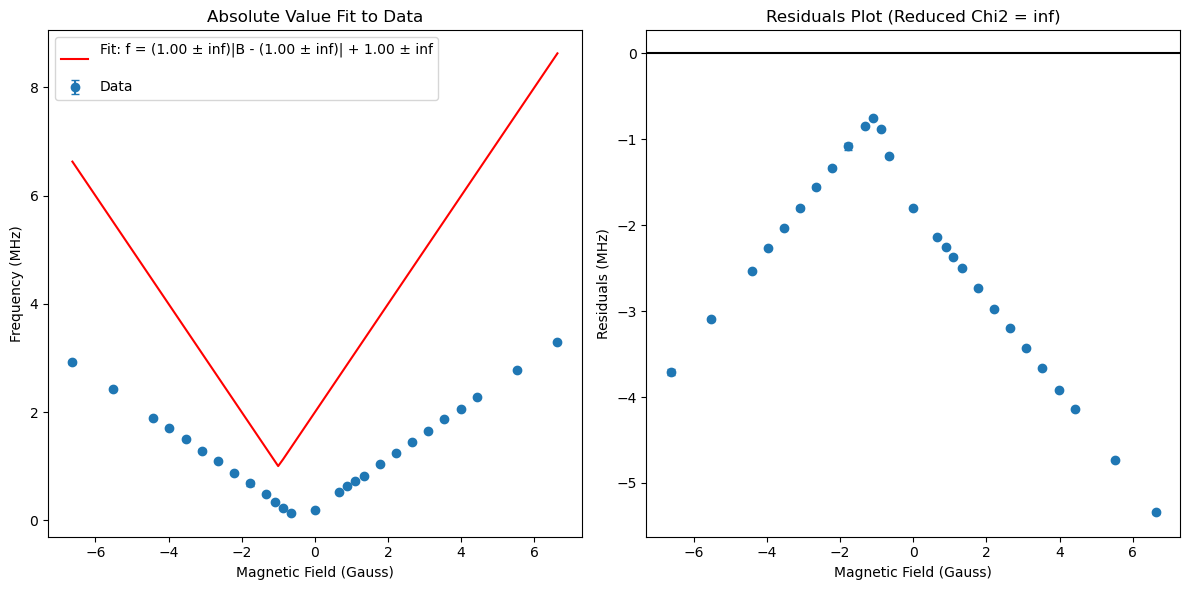

In [252]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the absolute value model with an offset
def abs_value_model(x, a, b, c):
    return a * np.abs(x + c) + b  # c allows for shifting the peak

typ = "85"
# Filter positive b87 values
b87_pos = b87
f87_pos = f87
f87_upper_err_pos = f87_upper_err
f87_lower_err_pos = f87_lower_err

# Calculate errors
pos_err = np.abs(f87_upper_err_pos - f87_pos)
neg_err = np.abs(f87_pos - f87_lower_err_pos)
avg_err = 0.5 * (pos_err + neg_err)

# Ensure no negative error values
avg_err = np.maximum(avg_err, 1e-10)  # Set a small positive value if errors are too small

avg_err_pos = np.abs(np.random.normal(0, resid_errs[f"{typ}_pos"], len(np.where(b87>0)[0])))
avg_err_neg = np.abs(np.random.normal(0, resid_errs[f"{typ}_neg"], len(np.where(b87<0)[0])))

avg_err = np.zeros(len(b87_pos))
avg_err[np.where(b87>0)] = avg_err_pos
avg_err[np.where(b87<0)] = avg_err_neg

# Fit using curve_fit with weights = 1 / sigma
popt, pcov = curve_fit(abs_value_model, b87_pos, f87_pos, sigma=0, absolute_sigma=True)
p0 = popt
popt, pcov = curve_fit(abs_value_model, b87_pos, f87_pos, sigma=avg_err, absolute_sigma=True, p0 = popt)
a_fit, b_fit, c_fit = popt
a_err, b_err, c_err = np.sqrt(np.diag(pcov))

# Calculate reduced chi-squared
residuals = f87_pos - abs_value_model(b87_pos, *popt)
chi2 = np.sum((residuals / avg_err) ** 2)
dof = len(b87_pos) - len(popt)  # Degrees of freedom
reduced_chi2 = chi2 / dof

# Plotting
x_fit = np.linspace(min(b87_pos), max(b87_pos), 100)
y_fit = abs_value_model(x_fit, a_fit, b_fit, c_fit)

plt.figure(figsize=(12, 6))

# Plot data with error bars and absolute value fit
plt.subplot(1, 2, 1)
plt.errorbar(b87_pos, f87_pos, yerr=avg_err, fmt='o', label='Data', capsize=3)
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: f = ({a_fit:.2f} ± {a_err:.4f})|B - ({c_fit:.2f} ± {c_err:.4f})| + {b_fit:.2f} ± {b_err:.4f}\n')
plt.xlabel('Magnetic Field (Gauss)')
plt.ylabel('Frequency (MHz)')
plt.legend()
plt.title('Absolute Value Fit to Data')

# Residuals plot
plt.subplot(1, 2, 2)
plt.errorbar(b87_pos, residuals, yerr=avg_err, fmt='o', label='Residuals', capsize=3)
plt.axhline(0, color='black', linestyle='-')
plt.xlabel('Magnetic Field (Gauss)')
plt.ylabel('Residuals (MHz)')
plt.title(f'Residuals Plot (Reduced Chi2 = {reduced_chi2:.2f})')

plt.tight_layout()
plt.show()


In [253]:
avg_err

array([0.00586914, 0.00159581, 0.0037539 , 0.00601207, 0.00330062,
       0.01331119, 0.00331454, 0.01472601, 0.01295974, 0.00020233,
       0.        , 0.0045004 , 0.01126116, 0.01712284, 0.00340091,
       0.00445938, 0.02442178, 0.02377749, 0.01520877, 0.04530928,
       0.00283493, 0.00962809, 0.00031989, 0.01652357, 0.00616511,
       0.01752183, 0.03289897])

In [254]:
avg_err_pos

array([0.00586914, 0.00159581, 0.0037539 , 0.00601207, 0.00330062,
       0.01331119, 0.00331454, 0.01472601, 0.01295974, 0.00020233,
       0.0045004 , 0.01126116, 0.01712284])

In [255]:
np.random.normal(0, resid_errs[f"{typ}_pos"], size=len(np.where(b87>0)[0]))

array([ 0.00503497,  0.00875493,  0.00076605, -0.00107127, -0.01531105,
        0.00906246, -0.00767025, -0.00188232, -0.01687784, -0.01157682,
        0.01064146,  0.00234773, -0.00410191])

In [256]:
p0

array([1., 1., 1.])

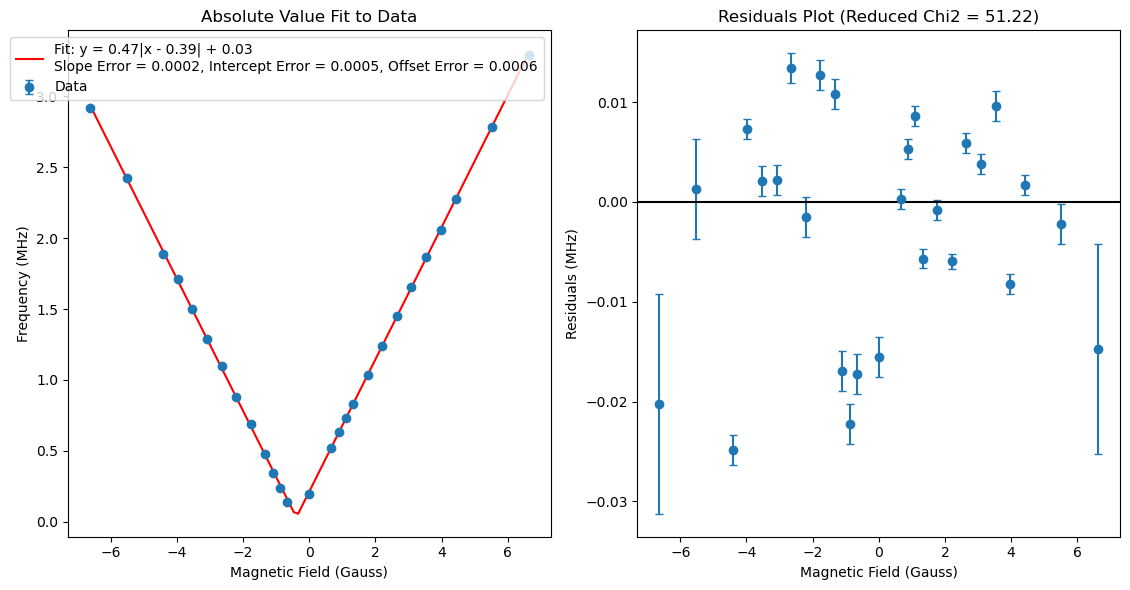

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the absolute value model with an offset
def abs_value_model(x, a, b, c):
    return a * np.abs(x + c) + b  # c allows for shifting the peak

# Filter positive b87 values
b87_pos = b87
f87_pos = f87
f87_upper_err_pos = f87_upper_err
f87_lower_err_pos = f87_lower_err

# Calculate errors
pos_err = np.abs(f87_upper_err_pos - f87_pos)
neg_err = np.abs(f87_pos - f87_lower_err_pos)
avg_err = 0.5 * (pos_err + neg_err)

# Ensure no negative error values
avg_err = np.maximum(avg_err, 1e-10)  # Set a small positive value if errors are too small

# Fit using curve_fit with weights = 1 / sigma
popt, pcov = curve_fit(abs_value_model, b87_pos, f87_pos, sigma=avg_err, absolute_sigma=True)
a_fit, b_fit, c_fit = popt
a_err, b_err, c_err = np.sqrt(np.diag(pcov))

# Calculate reduced chi-squared
residuals = f87_pos - abs_value_model(b87_pos, *popt)
chi2 = np.sum((residuals / avg_err) ** 2)
dof = len(b87_pos) - len(popt)  # Degrees of freedom
reduced_chi2 = chi2 / dof

# Plotting
x_fit = np.linspace(min(b87_pos), max(b87_pos), 100)
y_fit = abs_value_model(x_fit, a_fit, b_fit, c_fit)

plt.figure(figsize=(12, 6))

# Plot data with error bars and absolute value fit
plt.subplot(1, 2, 1)
plt.errorbar(b87_pos, f87_pos, yerr=avg_err, fmt='o', label='Data', capsize=3)
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: y = {a_fit:.2f}|x - {c_fit:.2f}| + {b_fit:.2f}\n' +
                                   f'Slope Error = {a_err:.4f}, Intercept Error = {b_err:.4f}, '
                                   f'Offset Error = {c_err:.4f}')
plt.xlabel('Magnetic Field (Gauss)')
plt.ylabel('Frequency (MHz)')
plt.legend()
plt.title('Absolute Value Fit to Data')

# Residuals plot
plt.subplot(1, 2, 2)
plt.errorbar(b87_pos, residuals, yerr=avg_err, fmt='o', label='Residuals', capsize=3)
plt.axhline(0, color='black', linestyle='-')
plt.xlabel('Magnetic Field (Gauss)')
plt.ylabel('Residuals (MHz)')
plt.title(f'Residuals Plot (Reduced Chi2 = {reduced_chi2:.2f})')

plt.tight_layout()
plt.show()


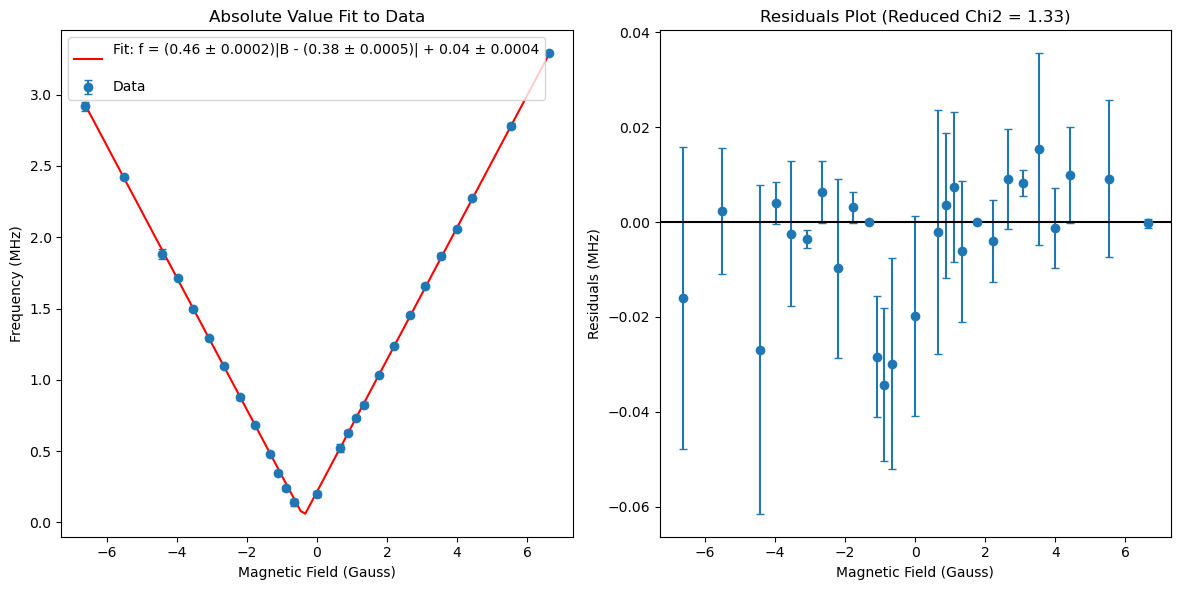

In [258]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the absolute value model with an offset
def abs_value_model(x, a, b, c):
    return a * np.abs(x + c) + b  # c allows for shifting the peak

# Filter positive b87 values
b87_pos = b87
f87_pos = f87
f87_upper_err_pos = f87_upper_err
f87_lower_err_pos = f87_lower_err

# Calculate errors
pos_err = np.abs(f87_upper_err_pos - f87_pos)
neg_err = np.abs(f87_pos - f87_lower_err_pos)
avg_err = 0.5 * (pos_err + neg_err)

#Ensure no negative error values
avg_err = np.abs(np.random.normal(0, 0.015115051664718097, size=len(b87_pos)))  # Set a small positive value if errors are too small

# Fit using curve_fit with weights = 1 / sigma
popt, pcov = curve_fit(abs_value_model, b87_pos, f87_pos, sigma=avg_err, absolute_sigma=True)
a_fit, b_fit, c_fit = popt
a_err, b_err, c_err = np.sqrt(np.diag(pcov))

# Calculate reduced chi-squared
residuals = f87_pos - abs_value_model(b87_pos, *popt)
chi2 = np.sum((residuals / avg_err) ** 2)
dof = len(b87_pos) - len(popt)  # Degrees of freedom
reduced_chi2 = chi2 / dof

# Plotting
x_fit = np.linspace(min(b87_pos), max(b87_pos), 100)
y_fit = abs_value_model(x_fit, a_fit, b_fit, c_fit)

plt.figure(figsize=(12, 6))

# Plot data with error bars and absolute value fit
plt.subplot(1, 2, 1)
plt.errorbar(b87_pos, f87_pos, yerr=avg_err, fmt='o', label='Data', capsize=3)
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: f = ({a_fit:.2f} ± {a_err:.4f})|B - ({c_fit:.2f} ± {c_err:.4f})| + {b_fit:.2f} ± {b_err:.4f}\n')
plt.xlabel('Magnetic Field (Gauss)')
plt.ylabel('Frequency (MHz)')
plt.legend()
plt.title('Absolute Value Fit to Data')

# Residuals plot
plt.subplot(1, 2, 2)
plt.errorbar(b87_pos, residuals, yerr=avg_err, fmt='o', label='Residuals', capsize=3)
plt.axhline(0, color='black', linestyle='-')
plt.xlabel('Magnetic Field (Gauss)')
plt.ylabel('Residuals (MHz)')
plt.title(f'Residuals Plot (Reduced Chi2 = {reduced_chi2:.2f})')

plt.tight_layout()
plt.show()


In [261]:
#best_fits = {}
# best_fits["85 a"] = a_fit
# best_fits["85 a err"] = a_err
# best_fits["85 b"] = a_fit
# best_fits["85 b err"] = b_err
# best_fits["85 c"] = c_fit
# best_fits["85 c err"] = c_err
# best_fits["85 chi2"] = reduced_chi2

# best_fits["87 a"] = a_fit
# best_fits["87 a err"] = a_err
# best_fits["87 b"] = a_fit
# best_fits["87 b err"] = b_err
# best_fits["87 c"] = c_fit
# best_fits["87 c err"] = c_err
# best_fits["87 chi2"] = reduced_chi2


In [260]:
best_fits

{'85 a': np.float64(0.7042070900368649),
 '85 a err': np.float64(0.00037232444152062724),
 '85 b': np.float64(0.7042070900368649),
 '85 b err': np.float64(0.0013086914504169633),
 '85 c': np.float64(0.4066348055232988),
 '85 c err': np.float64(0.0010271437810133394),
 '85 chi2': np.float64(94.1858868042156),
 '87 a': np.float64(0.4634072371552837),
 '87 a err': np.float64(0.00019832616871909864),
 '87 b': np.float64(0.4634072371552837),
 '87 b err': np.float64(0.0003927785820244632),
 '87 c': np.float64(0.38111925907031347),
 '87 c err': np.float64(0.0005116687310243689),
 '87 chi2': np.float64(1.3279720947904115)}

In [236]:
avg_err_pos = np.abs(np.random.normal(0, resid_errs[f"{typ}_pos"], len(np.where(b87>0)[0])))
avg_err_neg = np.abs(np.random.normal(0, resid_errs[f"{typ}_neg"], len(np.where(b87<0)[0])))

avg_err = np.zeros(len(b87_pos))
avg_err[np.where(b87>0)] = avg_err_pos
avg_err[np.where(b87<0)] = avg_err_neg

avg_err

array([0.00530619, 0.00106596, 0.01016123, 0.00126363, 0.01035027,
       0.00487995, 0.0125054 , 0.00156001, 0.01111258, 0.0135714 ,
       0.00463894, 0.01211229, 0.00126269, 0.00793965, 0.02047739,
       0.        , 0.00134895, 0.01474952, 0.00579077, 0.00082961,
       0.01764294, 0.00412947, 0.00490834, 0.03337219, 0.00280504,
       0.00252081, 0.01542893, 0.02092981, 0.0193    , 0.00554899,
       0.03449921])

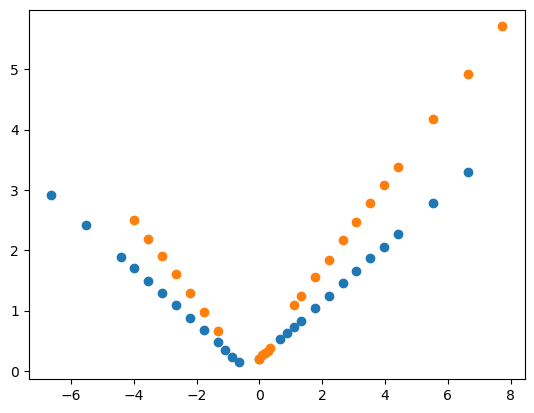

In [237]:
# Finding the nuclear spins

### ERROR ESTIMATES COMPARISON: 87 

b87 = df2["Mag Field (Gauss)"]
f87 = df2['87 Mid Frequency']
f87_upper_err = df2['87 Max Frequency']
f87_lower_err = df2['87 Min Frequency']


b85 = df1["Mag Field (Gauss)"]
f85 = df1['85 Mid Frequency']
f85_upper_err = df1['85 Max Frequency']
f85_lower_err = df1['85 Min Frequency']

condition = np.where(((0 > b87) | (b87>1)))[0]
f85 = f85.iloc[condition]
f85_upper_err = f85_upper_err.iloc[condition]
f85_lower_err = f85_lower_err.iloc[condition]
b85 = b85.iloc[condition]

plt.scatter(b87, f87, label="87")
plt.scatter(b85, f85, label="85")

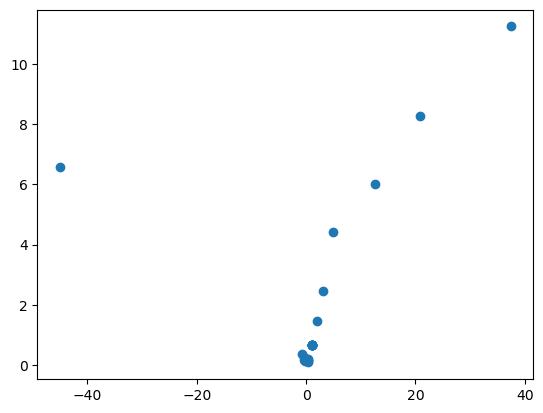

In [238]:
plt.scatter(b87/b85, f87/f85, label="87")

In [239]:
# using slopes
f = 0.46/0.7
print(f"{0.46/0.7} ± {0.46/0.7 * ( (0.0001/0.7)**2 + (0.002/0.46)**2 )**0.5}")

0.6571428571428573 ± 0.0028586847151632583


In [240]:
np.linspace(0, 10, 11)/2

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [241]:
for i in np.linspace(0, 10, 21):
    if (i-int(i))!=0:
        print(i)
        print(((2 * i + 1)/f - 1)/2)

0.5
1.0217391304347823
1.5
2.5434782608695645
2.5
4.065217391304347
3.5
5.586956521739129
4.5
7.108695652173912
5.5
8.630434782608694
6.5
10.152173913043477
7.5
11.673913043478258
8.5
13.195652173913041
9.5
14.717391304347824


In [242]:
# pairs: [1.5, 2.5], [3.5, 5.5], not sufficient to make a conclusive test?

In [243]:
import numpy as np

# Observed slope ratio and uncertainty
R_obs = f
sigma = 0.46/0.7 * ( (0.0001/0.7)**2 + (0.002/0.46)**2 )**0.5

# Candidate spin pairs (I_87, I_85)
spin_pairs = [(1.5, 2.5), (3.5, 5.5)]

# Loop over pairs and compute predicted ratio and chi^2
for I87, I85 in spin_pairs:
    R_model = (2*I87 + 1) / (2*I85 + 1)
    chi2 = ((R_obs - R_model) / sigma)**2
    print(f"Spin Pair I87={I87}, I85={I85}:")
    print(f"  Predicted Ratio = {R_model:.4f}")
    print(f"  Chi^2 = {chi2:.2f}")
    print()


Spin Pair I87=1.5, I85=2.5:
  Predicted Ratio = 0.6667
  Chi^2 = 11.10

Spin Pair I87=3.5, I85=5.5:
  Predicted Ratio = 0.6667
  Chi^2 = 11.10



In [325]:
R_obs, sigma

(0.6571428571428573, 0.0028586847151632583)

In [275]:
import numpy as np

# Observed slope ratio and uncertainty
R_obs = f
sigma = 0.46/0.7 * ( (0.0001/0.7)**2 + (0.002/0.46)**2 )**0.5

# Candidate spin pairs (I_87, I_85)
spin_pairs = [(1.5, 2.5), (3.5, 5.5)]

# Loop over pairs and compute predicted ratio, chi^2, and Z-score
for I87, I85 in spin_pairs:
    R_model = (2*I87 + 1) / (2*I85 + 1)
    chi2 = ((R_obs - R_model) / sigma)**2
    Z_score = np.abs(R_obs - R_model) / sigma

    print(f"Spin Pair I87={I87}, I85={I85}:")
    print(f"  Predicted Ratio = {R_model:.4f}")
    print(f"  Chi^2 = {chi2:.2f}")
    print(f"  Z-score = {Z_score:.4f}")
    
    # Check if the Z-score indicates 5-sigma rejection
    if Z_score >= 5:
        print("  5-sigma rejection of null hypothesis!")
    else:
        print("  Does NOT reject null hypothesis at 5-sigma level.")
    print()


Spin Pair I87=1.5, I85=2.5:
  Predicted Ratio = 0.6667
  Chi^2 = 11.10
  Z-score = 3.3315
  Does NOT reject null hypothesis at 5-sigma level.

Spin Pair I87=3.5, I85=5.5:
  Predicted Ratio = 0.6667
  Chi^2 = 11.10
  Z-score = 3.3315
  Does NOT reject null hypothesis at 5-sigma level.



In [263]:
# method 2 to calculate nuclear spins directly from slopes

best_fits

{'85 a': np.float64(0.7042070900368649),
 '85 a err': np.float64(0.00037232444152062724),
 '85 b': np.float64(0.7042070900368649),
 '85 b err': np.float64(0.0013086914504169633),
 '85 c': np.float64(0.4066348055232988),
 '85 c err': np.float64(0.0010271437810133394),
 '85 chi2': np.float64(94.1858868042156),
 '87 a': np.float64(0.4634072371552837),
 '87 a err': np.float64(0.00019832616871909864),
 '87 b': np.float64(0.4634072371552837),
 '87 b err': np.float64(0.0003927785820244632),
 '87 c': np.float64(0.38111925907031347),
 '87 c err': np.float64(0.0005116687310243689),
 '87 chi2': np.float64(1.3279720947904115)}

In [267]:
print(f"85: I = {((2.77/best_fits['85 a']) - 1)/2} ± {2.77/best_fits['85 a']**2 * best_fits['85 a err']}")
print(f"87: I = {((2.77/best_fits['87 a']) - 1)/2} ± {2.77/best_fits['87 a']**2 * best_fits['87 a err']}")

85: I = 1.4667510020773804 ± 0.0020796992214896916
87: I = 2.4887319164501926 ± 0.0025581980719883864


In [273]:
# statistical tests
Z85 = np.abs(((2.77/best_fits['85 a']) - 1)/2 - 1.5)/(2.77/best_fits['85 a']**2 * best_fits['85 a err'])
Z87 = np.abs(((2.77/best_fits['87 a']) - 1)/2 - 2.5)/(2.77/best_fits['87 a']**2 * best_fits['87 a err'])
print(Z87, Z85)


4.404695505477069 15.987407014944829


In [274]:
# Statistical tests
Z85 = np.abs(((2.77/best_fits['85 a']) - 1)/2 - 1.5)/(2.77/best_fits['85 a']**2 * best_fits['85 a err'])
Z87 = np.abs(((2.77/best_fits['87 a']) - 1)/2 - 2.5)/(2.77/best_fits['87 a']**2 * best_fits['87 a err'])

# Print Z-scores
print("Z85:", Z85)
print("Z87:", Z87)

# Check if the Z-scores correspond to a 5 sigma rejection of null
if Z85 >= 5:
    print("Z85 indicates a 5 sigma rejection of the null hypothesis.")
else:
    print("Z85 does NOT indicate a 5 sigma rejection of the null hypothesis.")

if Z87 >= 5:
    print("Z87 indicates a 5 sigma rejection of the null hypothesis.")
else:
    print("Z87 does NOT indicate a 5 sigma rejection of the null hypothesis.")


Z85: 15.987407014944829
Z87: 4.404695505477069
Z85 indicates a 5 sigma rejection of the null hypothesis.
Z87 does NOT indicate a 5 sigma rejection of the null hypothesis.


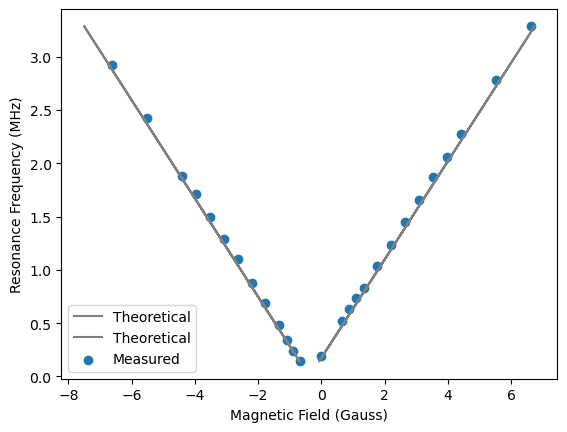

In [313]:
# 4: comparing theoretical coil b field to that from zeeman effect

err = np.abs(np.random.normal(0, 0.015115051664718097, size=len(f87)))
plt.plot(f87 /( 2.77 / (2 * 2.5 + 1) ) -  best_fits['87 c'] , f87, label="Theoretical", c="gray")
plt.plot(-f87 /( 2.77 / (2 * 2.5 + 1)) - best_fits['87 c'], f87, label="Theoretical", c="gray")
plt.scatter(b87, f87, label="Measured")
plt.errorbar(b87, f87, yerr = err, linewidth=0)
plt.ylabel("Resonance Frequency (MHz)")
plt.xlabel("Magnetic Field (Gauss)")
plt.legend()

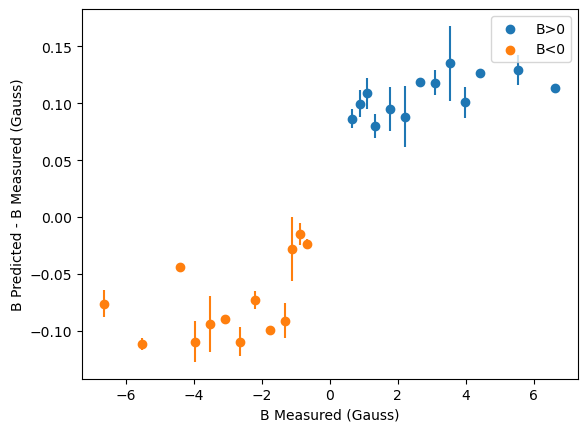

In [322]:
# residuals

condition = b87>0
plt.scatter(b87[condition], f87[condition] /( 2.77 / (2 * 2.5 + 1) ) - best_fits['87 c'] - b87[condition], label="B>0")
plt.errorbar(b87[condition], f87[condition] /( 2.77 / (2 * 2.5 + 1) ) - best_fits['87 c'] - b87[condition], yerr = err[condition], linestyle='')
condition = b87<0
plt.scatter(b87[condition], -f87[condition] /( 2.77 / (2 * 2.5 + 1) ) - best_fits['87 c'] - b87[condition], label="B<0")
plt.errorbar(b87[condition], -f87[condition] /( 2.77 / (2 * 2.5 + 1) ) - best_fits['87 c'] - b87[condition], yerr = err[condition], linestyle='')
plt.xlabel("B Measured (Gauss)")
plt.ylabel("B Predicted - B Measured (Gauss)")
plt.legend()

In [324]:
import numpy as np
from scipy.stats import norm

# Data
B_xy = 0.050  # G
B_xy_err = 0.0010  # G

theta_deg = 7.0  # degrees
theta_err_deg = 0.17  # degrees

# Convert to radians
theta = np.radians(theta_deg)
theta_err = np.radians(theta_err_deg)

# Calculate total B field from geometry
# B_tot = B_xy / sin(theta)
B_geom = B_xy / np.sin(theta)

# Error propagation: dB = B_xy * cot(theta) * dtheta + (1/sin(theta)) * dB_xy
dB_geom = np.sqrt(
    (B_xy * np.cos(theta) / np.sin(theta)**2 * theta_err)**2 +
    (1 / np.sin(theta) * B_xy_err)**2
)

# Zeeman-derived B field
B_zeeman = 0.435  # G
B_zeeman_err = 0.010  # G

# Z-score test
Z = np.abs(B_zeeman - 0.42) / np.sqrt(0.0018**2 + B_zeeman_err**2)
p_val = 2 * (1 - norm.cdf(Z))  # Two-tailed test

# Print results
print(f"Geometry-derived B field: {B_geom:.4f} ± {dB_geom:.4f} G")
print(f"Zeeman-derived B field: {B_zeeman:.4f} ± {B_zeeman_err:.4f} G")
print(f"Z-score: {Z:.2f}")
print("Reject null hypothesis at 5σ?" , "Yes" if Z > 5 else "No")


Geometry-derived B field: 0.4103 ± 0.0129 G
Zeeman-derived B field: 0.4350 ± 0.0100 G
Z-score: 1.48
Reject null hypothesis at 5σ? No


In [326]:
import pandas as pd

data = {
    "temp": [50.1, 48, 46, 44, 42, 41, 40, 38, 36, 35],
    "amp_85": [7, 7, 6, 6.5, 6.5, 6, 6, 5, 4.5, 4],
    "amp_87": [2, 3, 2, 1.5, 1, 1, 1, 0.75, 0.75, 0.75],
    "div": [0.2]*10,
    "multiply": [2]*10
}

df = pd.DataFrame(data)
print(df)


   temp  amp_85  amp_87  div  multiply
0  50.1     7.0    2.00  0.2         2
1  48.0     7.0    3.00  0.2         2
2  46.0     6.0    2.00  0.2         2
3  44.0     6.5    1.50  0.2         2
4  42.0     6.5    1.00  0.2         2
5  41.0     6.0    1.00  0.2         2
6  40.0     6.0    1.00  0.2         2
7  38.0     5.0    0.75  0.2         2
8  36.0     4.5    0.75  0.2         2
9  35.0     4.0    0.75  0.2         2


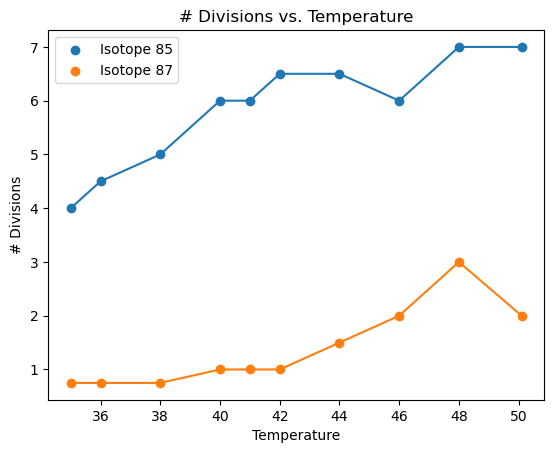

In [331]:
plt.scatter(df["temp"], df["amp_85"], label="Isotope 85")
plt.plot(df["temp"], df["amp_85"])
plt.scatter(df["temp"], df["amp_87"], label="Isotope 87")
plt.plot(df["temp"], df["amp_87"])
plt.xlabel("Temperature")
plt.ylabel("# Divisions")
plt.title("# Divisions vs. Temperature")
plt.legend()